In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df =pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)


In [4]:
df.sample

<bound method NDFrame.sample of       0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]>

In [5]:
X=df[[0,1,2,3,4,5,6,7]]
y=df[8]

In [6]:
X.shape

(768, 8)

In [7]:
X=(X-X.mean())/X.std()

In [8]:
# class diabetes:
#     def __init__(self,learning_rate=0.01,lambda_rate=0.01):
#         self.learning_rate=learning_rate
#         self.lambda_rate=lambda_rate
#         self.weight=None
#         self.bias=None
#         self.loss=[]
#         self.Epochs=None

    
    
    
#     def fit(self,X,y):
#         X.shape
#         m=len(X)
#         z=self._log_odds(X,y)
#         y_predict=self.sigmoid(z)
#         error=y_predict - y
#         gradient_weight=(1/m) * np.dot(X,error)
#         gradient_bias=(1/m) * np.sum(error)

#         gradient_weight += 2 * self.lambda_rate *self.weight

#         self.weight -= learning_rate * gradient_weight
#         self.bias -= learning_rate * gradient_bias
#         return self.weight,self.bias

#         np.random.seed(42)
#         self.weight=np.random.randn(X.shape[-1])
#         self.bias=np.random.randn()
#         self.Epochs=1000
#         # self.loss=[]

#         for epochs in range(self.Epochs):
#             z=_log_odds(X,y)
#             y_predict=sigmoid(z)
#             loss =  - np.mean(y*np.log(y_predict+(1-y)*np.log(1-y_predict)))
#             penalty=self.lambda_rate *self.weight**2
#             loss=loss +  penalty
#             self.losses.append(loss)
#             # losses=-np.mean()     
            
            
#     def _log_odds(self,X,y):
#         return np.dot(X,self.weight) + self.bias
#     def sigmoid(self,z):
#         return 1/(1 + np.exp(-z))

In [13]:
# model = diabetes()
# model.fit(X,y)

In [23]:
import numpy as np

class diabetesi:
    def __init__(self, learning_rate=0.01, lambda_rate=0.001):
        self.learning_rate = learning_rate
        self.lambda_rate = lambda_rate
        self.weight = None
        self.bias = None
        self.losses = []  # Fixed
        self.Epochs = None
        
    def _log_odds(self, X, y):
        return np.dot(self.weight, X.T) + self.bias

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        np.random.seed(42)
        self.weight = np.random.randn(X.shape[-1])
        self.bias = np.random.randn()
        self.Epochs = 10000

        m = len(X)
        for _ in range(self.Epochs):
            z = self._log_odds(X,y)  # Fixed
            y_predict = self.sigmoid(z)  # Fixed
            error = y_predict - y

            gradient_weight = (1 / m) * np.dot(X.T, error)
            gradient_bias = (1 / m) * np.sum(error)

            gradient_weight += 2 * self.lambda_rate * self.weight

            self.weight -= self.learning_rate * gradient_weight  # Fixed
            self.bias -= self.learning_rate * gradient_bias  # Fixed
            loss = -np.mean(y * np.log(y_predict) + (1 - y) * np.log(1 - y_predict))  # Fixed
            penalty = self.lambda_rate * np.sum(self.weight**2)
            loss += penalty
            self.losses.append(loss)

In [24]:
model = diabetesi()
model.fit(X,y)

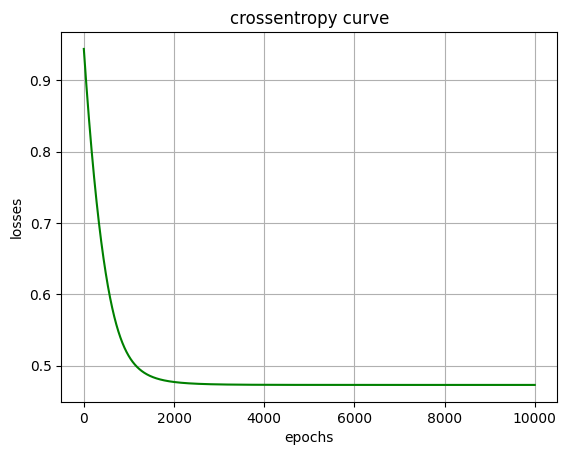

In [25]:
plt.plot(model.losses,color='green')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('crossentropy curve')
plt.grid(True)
plt.show()